In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')


100%|██████████| 26421880/26421880 [00:01<00:00, 17581167.82it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 302299.29it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5519602.02it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4356795.20it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [107]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 42)
        self.fc6 = nn.Linear(42, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = torch.relu(self.fc5(x))
        x = self.fc6(x)
        return x

net = Net()


In [108]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)


In [109]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')


[1,   100] loss: 1.120
[1,   200] loss: 0.657
[1,   300] loss: 0.566
[1,   400] loss: 0.520
[1,   500] loss: 0.505
[1,   600] loss: 0.468
[1,   700] loss: 0.469
[1,   800] loss: 0.457
[1,   900] loss: 0.432
[2,   100] loss: 0.410
[2,   200] loss: 0.401
[2,   300] loss: 0.380
[2,   400] loss: 0.407
[2,   500] loss: 0.382
[2,   600] loss: 0.384
[2,   700] loss: 0.387
[2,   800] loss: 0.393
[2,   900] loss: 0.394
[3,   100] loss: 0.356
[3,   200] loss: 0.351
[3,   300] loss: 0.338
[3,   400] loss: 0.341
[3,   500] loss: 0.358
[3,   600] loss: 0.355
[3,   700] loss: 0.352
[3,   800] loss: 0.348
[3,   900] loss: 0.355
[4,   100] loss: 0.323
[4,   200] loss: 0.328
[4,   300] loss: 0.311
[4,   400] loss: 0.317
[4,   500] loss: 0.318
[4,   600] loss: 0.316
[4,   700] loss: 0.306
[4,   800] loss: 0.325
[4,   900] loss: 0.334
[5,   100] loss: 0.283
[5,   200] loss: 0.283
[5,   300] loss: 0.308
[5,   400] loss: 0.313
[5,   500] loss: 0.308
[5,   600] loss: 0.302
[5,   700] loss: 0.311
[5,   800] 

In [110]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 87 %


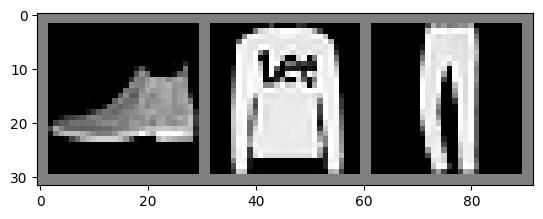

GroundTruth:  Ankle boot Pullover Trouser
Predicted:  Ankle boot Pullover Trouser
[[837   4  14  20   1   0 112   0  12   0]
 [  1 973   0  21   1   0   2   0   2   0]
 [ 17   3 814  13  48   0 104   0   1   0]
 [ 21  21  12 886  25   0  30   0   5   0]
 [  1   1 158  46 694   0  98   0   2   0]
 [  0   0   0   2   0 931   1  49   6  11]
 [118   1  92  30  39   0 711   0   9   0]
 [  0   0   0   0   0  13   0 976   1  10]
 [  1   1   0   6   2   3   7   5 975   0]
 [  0   0   0   0   0   9   1  74   0 916]]


In [111]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Get the first batch of data from the test loader
images, labels = next(iter(testloader))

# Show three images with their predictions
outputs = net(images)
_, predicted = torch.max(outputs, 1)

# Function to display an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Display images with predictions
imshow(torchvision.utils.make_grid(images[:3]))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(3)))
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(3)))

# Convert tensor to numpy array for confusion matrix
all_labels = []
all_predicted = []

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.numpy())
        all_predicted.extend(predicted.numpy())

# Generate confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predicted)
print(conf_matrix)


